Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [n]
>Metropolis: [Y_star]
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytensor\scalar\basic.py:2052: RuntimeWarning: invalid value encountered in scalar subtract
  return x - y
Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Sampling: [Y_star]


Output()

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [n]
>Metropolis: [Y_star]
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytensor\scalar\basic.py:2052: RuntimeWarning: invalid value encountered in scalar subtract
  return x - y
Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
Sampling: [Y_star]


Output()

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [n]
>Metropolis: [Y_star]
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytensor\scalar\basic.py:2052: RuntimeWarning: invalid value encountered in scalar subtract
  return x - y
Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Sampling: [Y_star]


Output()

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [n]
>Metropolis: [Y_star]
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytensor\scalar\basic.py:2052: RuntimeWarning: invalid value encountered in scalar subtract
  return x - y
Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Sampling: [Y_star]


Output()

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [n]
>Metropolis: [Y_star]
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytensor\scalar\basic.py:2052: RuntimeWarning: invalid value encountered in scalar subtract
  return x - y
Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Sampling: [Y_star]


Output()

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [n]
>Metropolis: [Y_star]
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytensor\scalar\basic.py:2052: RuntimeWarning: invalid value encountered in scalar subtract
  return x - y
Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Sampling: [Y_star]


Output()

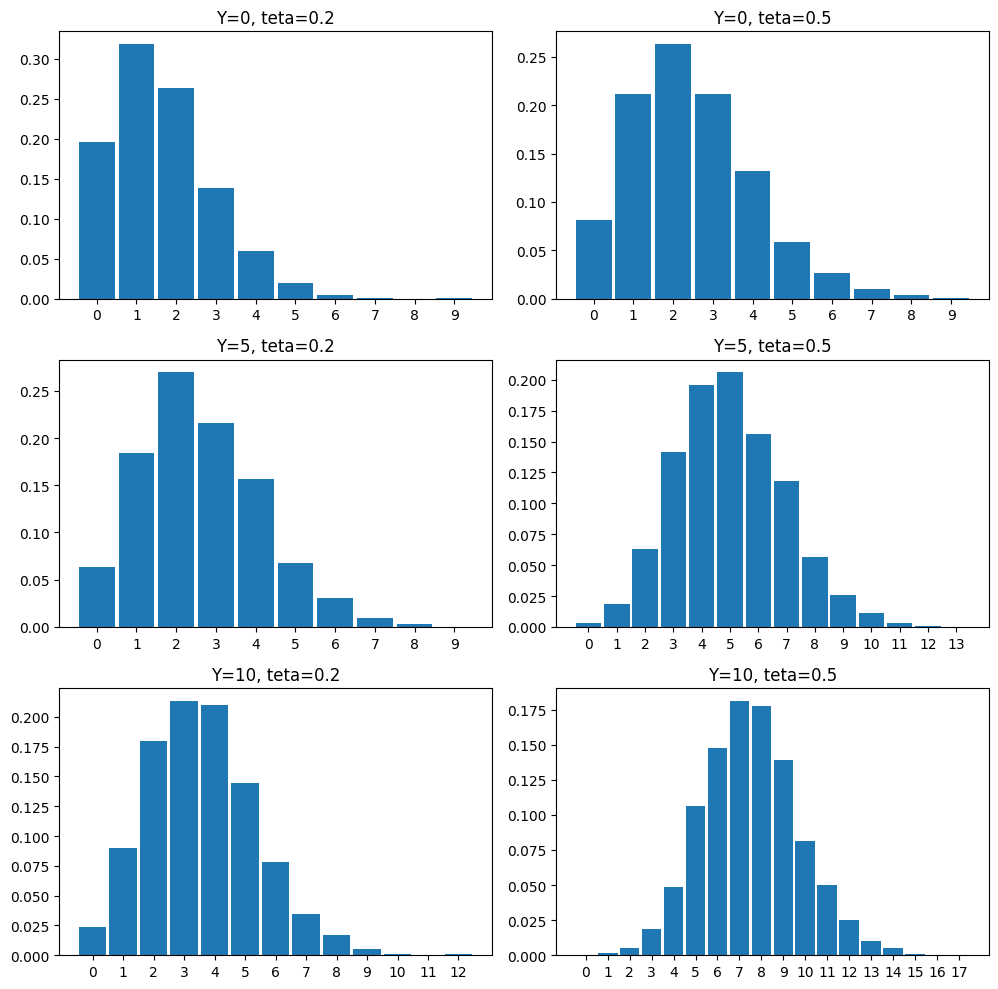

In [ ]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

Y = [0, 5, 10]
Teta = [0.2, 0.5]
fig, axes = plt.subplots(len(Y), len(Teta), figsize=(10, 10))

for i, y in enumerate(Y):
    for j, teta in enumerate(Teta):
        with pm.Model() as model:
            n = pm.Poisson("n", 10)
            pm.Binomial("Y", n=n, p=teta, observed=y)
            Y_star = pm.Binomial("Y_star", n=n, p=teta)
            trace = pm.sample(
                draws=2000,
                tune=2000,
                step=pm.Metropolis(),
                chains=2,
                cores=1,
                progressbar=False,
                random_seed=2025,
            )
            post_pred = pm.sample_posterior_predictive(trace, var_names=["Y_star"])
            ax = axes[i, j]
            y_star_samples = post_pred.posterior_predictive['Y_star'].values.flatten()
            
            az.plot_dist(y_star_samples, ax=ax, kind='hist')
            ax.set_title(f"Y={y}, teta={teta}")

plt.tight_layout()
plt.show()